In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

In [ ]:
#Loading the data set
data=pd.read_csv('/content/exp_vs_salary_Data.csv')

In [ ]:
#let us try to visualize our data 
data.head()

,YearsExperience,Salary
0,1.2,39342
1,1.2,46205
2,1.4,37730
3,2.0,43524
4,2.2,39890


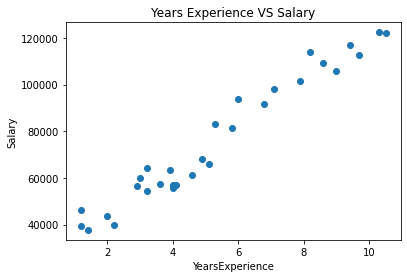

In [ ]:
# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(data.YearsExperience,data.Salary)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Years Experience VS Salary")
plt.show()

In [ ]:
#Splitting the dataset into  training and testing dataset
train, test = train_test_split(data,  test_size = 0.2)

In [ ]:
#Converting training data into tensors for Pytorch
X_train = torch.Tensor([[x] for x in list(train.YearsExperience)])
y_train = torch.torch.FloatTensor([[x] for x in list(train.Salary)])
#Converting test data into tensors for Pytorch
X_test = torch.Tensor([[x] for x in list(test.YearsExperience)])
y_test = torch.torch.FloatTensor([[x] for x in list(test.Salary)])



In [ ]:
class LinearRegression(nn.Module):
    def __init__(self, in_size, out_size):
       super().__init__()
       self.lin = nn.Linear(in_features = in_size, out_features = out_size)
    def forward(self, X):
        pred = self.lin(X)
        return(pred)

In [ ]:
#Data set & Data set Loader
from torch.utils.data import TensorDataset
train_data=TensorDataset(X_train, y_train)
train_data[0:5]

(tensor([[ 8.6000],
         [ 2.0000],
         [10.3000],
         [ 5.8000],
         [ 8.2000]]), tensor([[109430.],
         [ 43524.],
         [122390.],
         [ 81362.],
         [113812.]]))

In [ ]:
# Define data loader
from torch.utils.data import DataLoader
batch_size = 5
train_dl = DataLoader(train_data, batch_size, shuffle=True)


In [ ]:
# Define model
model = nn.Linear(1, 1) # nn.Linear(in_features,out_features)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.0885]], requires_grad=True)
Parameter containing:
tensor([0.4374], requires_grad=True)


In [ ]:
# printing the model Parameters
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0885]], requires_grad=True), Parameter containing:
tensor([0.4374], requires_grad=True)]


In [ ]:
# Generate predictions
preds = model(X_train)
preds

tensor([[-0.3235],
        [ 0.2605],
        [-0.4739],
        [-0.0757],
        [-0.2881],
        [-0.0934],
        [-0.4208],
        [-0.2615],
        [ 0.0747],
        [-0.3942],
        [ 0.3313],
        [-0.0138],
        [-0.1642],
        [ 0.3313],
        [ 0.1189],
        [ 0.0835],
        [ 0.1543],
        [-0.3588],
        [ 0.1808],
        [ 0.0835],
        [-0.4916],
        [ 0.0924],
        [-0.0315],
        [ 0.2428]], grad_fn=<AddmmBackward>)

In [ ]:
#Define the loss function
loss_fun = nn.MSELoss()

In [ ]:
#compute loss for current prediction
loss=loss_fun(model(X_train),y_train)
print(loss)

tensor(7.0447e+09, grad_fn=<MseLossBackward>)


In [ ]:
# Define SGD optimizer with learning rate 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Train the model

We are now ready to train the model. We'll follow the exact same process to implement gradient descent:

Generate predictions

Calculate the loss

Compute gradients w.r.t the weights and biases

Adjust the weights by subtracting a small quantity proportional to the gradient

Reset the gradients to zero

In [ ]:
# Utility function to train the model
def lrmodel(num_epochs, model, loss_fun, optimizer, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fun(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            optimizer.step()
            
            # 5. Reset the gradients to zero
            optimizer.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [ ]:
#Training for 100 epochs
num_epochs=100
lrmodel(num_epochs, model, loss_fun, optimizer, train_dl)



Epoch [10/100], Loss: 16100727.0000
Epoch [20/100], Loss: 58836576.0000
Epoch [30/100], Loss: 24312672.0000
Epoch [40/100], Loss: 30125348.0000
Epoch [50/100], Loss: 59348696.0000
Epoch [60/100], Loss: 31803738.0000
Epoch [70/100], Loss: 24751144.0000
Epoch [80/100], Loss: 36488976.0000
Epoch [90/100], Loss: 14319942.0000
Epoch [100/100], Loss: 64535912.0000


In [ ]:
# Generate predictions
preds = model(X_train)
preds

tensor([[109632.5938],
        [ 45824.9609],
        [126067.8906],
        [ 82562.6875],
        [105765.4609],
        [ 84496.2500],
        [120267.1953],
        [102865.1172],
        [ 66127.3906],
        [117366.8438],
        [ 38090.7031],
        [ 75795.2109],
        [ 92230.5156],
        [ 38090.7031],
        [ 61293.4766],
        [ 65160.6094],
        [ 57426.3516],
        [113499.7188],
        [ 54526.0000],
        [ 65160.6094],
        [128001.4531],
        [ 64193.8281],
        [ 77728.7812],
        [ 47758.5234]], grad_fn=<AddmmBackward>)

In [ ]:
# Compare with targets
y_train

tensor([[109430.],
        [ 43524.],
        [122390.],
        [ 81362.],
        [113812.],
        [ 93940.],
        [112635.],
        [101302.],
        [ 57081.],
        [116969.],
        [ 46205.],
        [ 66028.],
        [ 91738.],
        [ 39342.],
        [ 57188.],
        [ 56957.],
        [ 64445.],
        [105582.],
        [ 56642.],
        [ 55794.],
        [121870.],
        [ 63218.],
        [ 83088.],
        [ 39890.]])

In [ ]:
#Predicting for X_test
y_pred_test = model(X_test)

In [ ]:

#Converting predictions from tensor objects into a list

y_pred_test = [y_pred_test[x].item() for x in range(len(y_pred_test))]
# Comparing Actual and predicted values
df = {}
df['Actual Observation'] = y_test
df['Predicted Salary'] = y_pred_test
df = pd.DataFrame(df)
print(df)

  Actual Observation  Predicted Salary
0  (tensor(67938.),)      73861.648438
1  (tensor(61110.),)      70961.296875
2  (tensor(98272.),)      95130.859375
3  (tensor(37730.),)      40024.265625
4  (tensor(60150.),)      55492.781250
5  (tensor(54445.),)      57426.351562
